<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml04_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets  # load_iris 사용하기 위해서
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler  # 특성 스켕일
from sklearn.neighbors import KNeighborsClassifier  # KNN 알고리즘 분류기
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # 평가지표

# 데이터 준비



---



In [15]:
# Bunch 객체의 속성들 중에서 특성 배열(X), 타겟 배열(y)만 리턴.
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [16]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# Bunch 객체의 속성들 중에서 특성 배열을 DataFrame으로, 타겟 배열을 Series로 리턴.
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

In [19]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64



---



In [21]:
iris = datasets.load_iris()

In [22]:
type(iris)  #> Bunch

sklearn.utils.Bunch

`bunch`: Python의 `dict` 클래스와 비슷. 

*   `key: value` 형식으로 아이템들을 저장하는 데이터 타입.
*   `bunch['key']` 또는 `bunch.key` 형식으로 value들을 사용할 수 있음.

In [23]:
iris.keys()  # Bunch 객체의 key들의 집합을 리턴.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
X, y = iris.data.copy(), iris.target.copy()

In [25]:
X.shape, y.shape
#> 특성 배열(150 샘플, 4개 특성), 타겟 배열(150 샘플)

((150, 4), (150,))

In [26]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
y[:5]

array([0, 0, 0, 0, 0])

In [28]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

# 이진 분류(Binary-class Classification)

In [31]:
# 이진 분류에서 사용할 타겟 배열(0:setosa, 1:Non-Setosa)
# y[y == 2] = 1
# y[y != 0] = 1
y = np.where(y == 0, 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
np.unique(y, return_counts=True)

(array([0, 1]), array([ 50, 100]))

## 훈련 셋/테스트 셋 분리

In [33]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

In [34]:
X_tr.shape, X_te.shape

((120, 4), (30, 4))

In [35]:
np.unique(y_tr, return_counts=True)

(array([0, 1]), array([40, 80]))

In [36]:
np.unique(y_te, return_counts=True)

(array([0, 1]), array([10, 20]))

## Feature scaling

In [37]:
scaler = StandardScaler()  # Scaler 객체 생성

In [38]:
X_tr_scaled = scaler.fit_transform(X_tr)  # 훈련 셋 스케일링

In [39]:
X_te_scaled = scaler.transform(X_te)  # 테스트 셋 스케일링

## KNN 모델 훈련

In [40]:
knn = KNeighborsClassifier()  # 모델 생성

In [41]:
knn.fit(X_tr_scaled, y_tr)  # 모델 훈련

KNeighborsClassifier()

In [42]:
tr_pred = knn.predict(X_tr_scaled)  # 훈련 셋 예측값
tr_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [43]:
accuracy_score(y_tr, tr_pred)  # 훈련 셋 정확도

1.0

In [44]:
te_pred = knn.predict(X_te_scaled)  # 테스트 셋 예측값
te_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1])

In [45]:
accuracy_score(y_te, te_pred)  # 테스트 셋 정확도

1.0

## k 값의 변화에 따른 테스트 셋의 정확도

In [47]:
accuracies = []  # 테스트 셋의 정확도를 저장할 리스트
k_values = np.arange(1, 121)  # k 값의 범위
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # 모델 생성
    knn.fit(X_tr_scaled, y_tr)  # 모델 훈련
    acc = knn.score(X_te_scaled, y_te)  # 테스트 셋 정확도
    accuracies.append(acc)

print(accuracies)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666

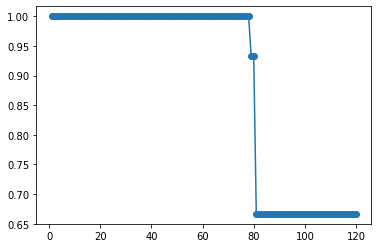

In [48]:
plt.plot(k_values, accuracies, 'o-')
plt.show()

# 다중 클래스 분류(Multi-class classification)

In [62]:
# X: 특성 배열(150, 4), y: 타겟 배열(150,)
X, y = iris.data.copy(), iris.target.copy()

In [63]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

## Train/test split

In [64]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

In [65]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [66]:
np.unique(y_te, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

## Feature scaling

In [67]:
scaler = StandardScaler()  # Scaler 생성

In [68]:
X_tr_scaled = scaler.fit_transform(X_tr)  # 훈련 셋 스케일링

In [69]:
X_te_scaled = scaler.transform(X_te)  # 테스트 셋 스케일링

## KNN 모델 훈련, 평가

In [70]:
knn = KNeighborsClassifier()  # 모델 생성

In [71]:
knn.fit(X_tr_scaled, y_tr)  # 모델 훈련(학습)

KNeighborsClassifier()

In [74]:
tr_pred = knn.predict(X_tr_scaled)  # 훈련 셋 예측값 -> shape: (120,)
tr_pred[:6]

array([0, 1, 1, 0, 1, 2])

In [73]:
tr_proba = knn.predict_proba(X_tr_scaled)  # 훈련 셋 예측 확률 -> shape: (120, 3)
tr_proba[:6]

array([[1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8]])

In [75]:
accuracy_score(y_tr, tr_pred)  # 훈련 셋 정확도

0.975

In [76]:
confusion_matrix(y_tr, tr_pred)  # 훈련 셋 오차 행렬(혼동 행렬, 혼돈 행렬)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

실제 Versicolor 40개 중에서 1개는 Virginica로 잘못 예측.

실제 Virginica 40개 중에서 2개는 Versicolor로 잘못 예측.

In [77]:
report = classification_report(y_tr, tr_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [81]:
te_pred = knn.predict(X_te_scaled)  # 테스트 셋 예측값
te_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 0, 2, 0])

In [82]:
accuracy_score(y_te, te_pred)  # 테스트 셋 예측값

0.9333333333333333

In [83]:
confusion_matrix(y_te, te_pred)  # 테스트 셋 오차 행렬

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [87]:
te_report = classification_report(y_te, te_pred)
print(te_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [84]:
from sklearn.metrics import precision_score

In [86]:
precision_score(y_te, te_pred, average=None)

array([1.        , 0.83333333, 1.        ])